In [1]:
# Solución de la Ecuación diferencial del péndulo forzado y amortiguado
# d^2x/dt^t + nu dx/dt + sen(x) = tau sen(2 pi f t)

import math

# Parámetros iniciales
h = 0.01 # Longitud de intervalo
n = 9000 # Numero de pasos

# Condiciones iniciales
t_0 = 0.0
x_10 = 0.0
x_20 = 0.0
x_30 = 0.0

# Constantes físicas
nu = 0.5
frec = 1/(6 * math.pi)
tau_vec = (0.90, 1.07, 1.15)

# Escoger Tau
num = int(input("Elige Tau [1/2/3]: "))
if num == 1:
    tau = tau_vec[0]
elif num == 2:
    tau = tau_vec[1]
elif num == 3:
    tau = tau_vec[2]
else:
  print("Tau no valido")
  quit()

# Definición de la ecuación diferencial dx/dt = f
def f(x1, x2, x3, time, tau, nu, frec):
    f_1 = x2
    f_2 = tau * math.sin(x3) - nu * x2 - math.sin(x1)
    f_3 = 2 * math.pi * frec
    return (f_1, f_2, f_3)

# Inicialización de arreglos
x = [[x_10], [x_20], [x_30]]  # Arreglos para soluciones x
tiempo = [t_0]                # Arreglo para tiempos

# Bucle para calcular las soluciones con el método de Runge-Kutta
for i in range(n):
    k = [[], [], []]  # Inicializar pendientes en cada paso

    # Paso 1
    x1, x2, x3 = x[0][i], x[1][i], x[2][i]
    vec = f(x1, x2, x3, tiempo[i], tau, nu, frec)
    for j in range(3):
        k[j].append(vec[j])

    # Paso 2
    x1 = x[0][i] + k[0][0] * h / 2.0
    x2 = x[1][i] + k[1][0] * h / 2.0
    x3 = x[2][i] + k[2][0] * h / 2.0
    vec = f(x1, x2, x3, tiempo[i] + h / 2.0, tau, nu, frec)
    for j in range(3):
        k[j].append(vec[j])

    # Paso 3
    x1 = x[0][i] + k[0][1] * h / 2.0
    x2 = x[1][i] + k[1][1] * h / 2.0
    x3 = x[2][i] + k[2][1] * h / 2.0
    vec = f(x1, x2, x3, tiempo[i] + h / 2.0, tau, nu, frec)
    for j in range(3):
        k[j].append(vec[j])

    # Paso 4
    x1 = x[0][i] + k[0][2] * h
    x2 = x[1][i] + k[1][2] * h
    x3 = x[2][i] + k[2][2] * h
    vec = f(x1, x2, x3, tiempo[i] + h, tau, nu, frec)
    for j in range(3):
        k[j].append(vec[j])

    # Avance de las soluciones
    for j in range(3):
        x_j = x[j][i] + h * (k[j][0] + 2.0 * k[j][1] + 2.0 * k[j][2] + k[j][3]) / 6.0
        x[j].append(x_j)

    # Avance del tiempo
    t = tiempo[i] + h
    tiempo.append(t)


# Fin del método de Runge kutta de orden cuatro para la ecuación de un pendulo forzado y amortiguado



Elige Tau [1/2/3]: 1


In [2]:
# Guardar resultados en archivos

# Archivo 1: tiempo vs posicion
with open('position.dat', 'w') as f1:
    for t, s0 in zip(tiempo, x[0]):
        f1.write(f"{t} {s0}\n")

# Archivo 2: tiempo vs velocidad
with open('velocity.dat', 'w') as f2:
    for t, s1 in zip(tiempo, x[1]):
        f2.write(f"{t} {s1}\n")

#AL FINAL NI USÉ ESTE PERO QUE SE QUEDE AHÍ POR SI ACASO
# Archivo 3: posición vs velocidad
# with open('phase.dat', 'w') as f3:
#     for s0, s1 in zip(x[0], x[1]):
#         f3.write(f"{s0} {s1}\n")



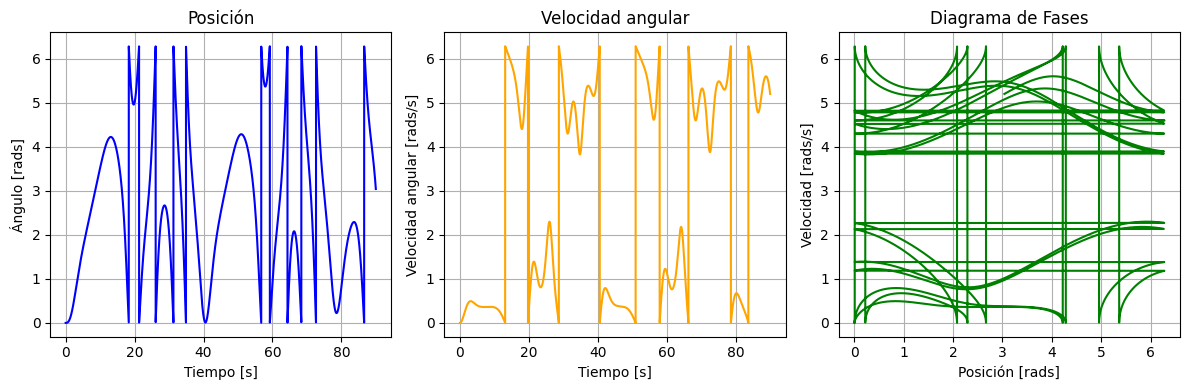

In [107]:
# Gráficas

import numpy as np
import matplotlib.pyplot as plt

# Lectura de datos
x1, y1 = np.loadtxt('position.dat', unpack=True)
x2, y2 = np.loadtxt('velocity.dat', unpack=True)

# Delimitación de datos al intervalo [0,2Pi]
y1 = np.mod(y1, 2 * np.pi)
y2 = np.mod(y2, 2 * np.pi)

# Gráfica de posición vs tiempo
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x1, y1, color='blue')
plt.title('Posición')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rads]')
plt.grid()

# Gráfica de velocidad vs tiempo
plt.subplot(1, 3, 2)
plt.plot(x2, y2, color='orange')
plt.title('Velocidad angular')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad angular [rads/s]')
plt.grid()

# Gráfica del diagrama de fases
plt.subplot(1, 3, 3)
plt.plot(y1, y2, color='green')
plt.title('Diagrama de Fases')
plt.xlabel('Posición [rads]')
plt.ylabel('Velocidad [rads/s]')
plt.grid()

plt.tight_layout()
plt.show()



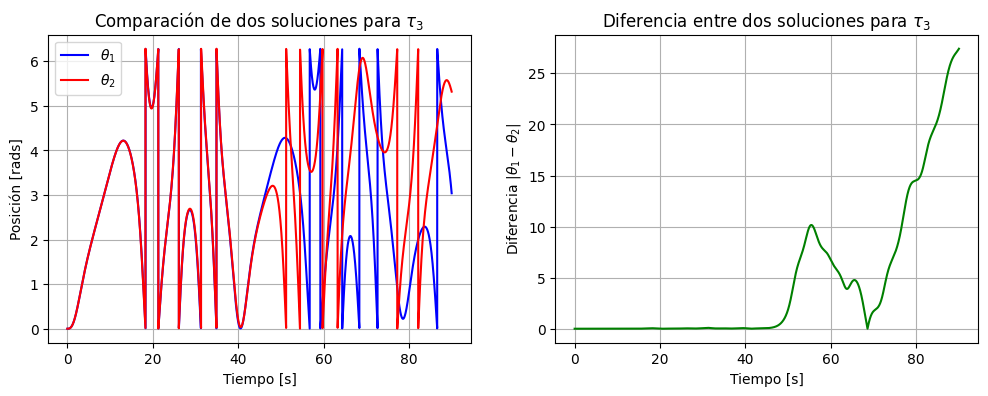

In [116]:
# Comparación de soluciones con condiciones iniciales diferentes

# Lectura de archivos
data1 = np.loadtxt('position1_3.dat')
data2 = np.loadtxt('position2_3.dat')

t1, x1 = data1[:, 0], data1[:, 1]
t2, x2 = data2[:, 0], data2[:, 1]

# Verificar que los tiempos sean iguales para ambas soluciones
if not np.array_equal(t1, t2):
    raise ValueError("Los tiempos en los archivos no coinciden.")

diff = np.abs(x1 - x2) #Diferencia de las soluciones

xx1 = np.mod(x1, 2 * np.pi)
xx2 = np.mod(x2, 2 * np.pi)

# Gráfico de las soluciones
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(t1, xx1, label=r'$\theta_1$', color='blue')
plt.plot(t2, xx2, label=r'$\theta_2$', color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [rads]')
plt.title(r'Comparación de dos soluciones para $\tau_3$')
plt.legend()
plt.grid()

# Gráfico de la diferencia |x1 - x2|
plt.subplot(1, 2, 2)
plt.plot(t1, diff, label='|$\theta_1 - \theta_2$|', color='green')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'Diferencia |$\theta_1 - \theta_2$|')
plt.title(r'Diferencia entre dos soluciones para $\tau_3$')
plt.grid()
plt.show()

